<a href="https://colab.research.google.com/github/cmunozcortes/cs249/blob/main/cs249_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS249 Problem Set 2: Statistical Inference II

## 1 Hypothesis Testing

In [ ]:
import numpy as np
from scipy import stats

y_1 = np.array([143, 102, 119, 157, 146, 61, 119, 85, 87, 102])
y_2 = np.array([77, 143, 108, 76, 92, 87, 145, 60, 86, 27])
y_3 = np.array([19, 83, 87, 55, 115, 41, 71, 66, 101, 99])

112.1
28.973953820630005


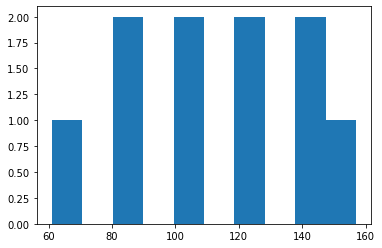

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_1)
print(np.mean(y_1))
print(np.std(y_1))

(a) Can your friend expect an increase in her salary on average if she chooses \#1?

In this case the more appropriate null hypothesis would be a one-tailed test, where we rejec the null hypothesis if $\frac{p}{2} < \alpha$ and $t>0$ (i.e. _greater-than_ test).

In [ ]:
# Null hypothesis: H_0: mean <= 70k
mu_0 = 70
t_stat, p_val = stats.ttest_1samp(y_1, mu_0)
print(f"t-stat: {t_stat}")
print(f"p-value: {p_val/2}")

t-stat: 4.35908750258558
p-value: 0.0009129462580935929


Since $\frac{p}{2} < \alpha$ and $t>0$, we reject the null hypothesis. Therefore, our friend should not expect an increase in her salary on average if she chooses \#1.

(b) Is there any difference between the average salary of the three choices?

We can answer this question by doing a $k$-group test on the three sets with a null hypothesis $H_0: \mu_1 = \mu_2 = \mu_3$.

In [ ]:
f_stat, p_val = stats.f_oneway(y_1, y_2, y_3)
print(f"f-stat: {f_stat}")
print(f"p-value: {p_val}")

f-stat: 3.62553394652035
p-value: 0.0403004821014734


In this case we have strong enough evidence to assert that the mean salary of the three choices are different from eacher.

(c) Is there any difference between the average salary of \#1 and \#3?

As with the previous questions, we can answer this question by proposing a null hypothesis $H_0: \mu_1 = \mu_3$ and verifying its validity.

In [ ]:
t_stat, p_val = stats.ttest_ind(y_1, y_3, equal_var=True)
print(f"t-stat: {t_stat}")
print(f"p-value: {p_val}")

t-stat: 2.8597848493128635
p-value: 0.010410173215386046


Since $p < \alpha$ we can reject the null hypothesis and assert that the mean salary for choice 1 and choice 2 are different.

##2 Regression to the Mean

(a) Assume `x` represents the height of the father and `y` represents the height of the son. Standardize the two covariates.

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/father_son.txt', delim_whitespace=True)
df.head()
print(df.describe())

            Father          Son
count  1078.000000  1078.000000
mean     67.686827    68.684230
std       2.745827     2.816194
min      59.000000    58.500000
25%      65.800000    66.900000
50%      67.800000    68.600000
75%      69.600000    70.500000
max      75.400000    78.400000


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


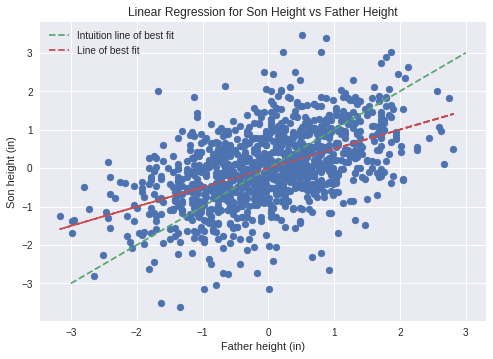

In [ ]:
# Standardize the two covariates
def transform_feature(feature):
  return (feature - np.mean(feature)) / np.std(feature)

x = transform_feature(df['Father'])
y = transform_feature(df['Son'])

import matplotlib.pyplot as plt

print(plt.style.available)
plt.style.use('seaborn')

fig, ax = plt.subplots()
ax.scatter(x, y)

# Create y=x line (intuition line of best fit)
x_int = np.linspace(-3,3)
y_int = x_int
ax.plot(x_int, y_int, linestyle='dashed', color='C1')

from sklearn.linear_model import LinearRegression

x = x.values.reshape(-1, 1)
y = y.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_hat = model.predict(x)
ax.plot(x, y_hat, linestyle='dashed', color='C2')
ax.legend(['Intuition line of best fit', 'Line of best fit'])
ax.set_title('Linear Regression for Son Height vs Father Height')
ax.set_ylabel('Son height (in)')
ax.set_xlabel('Father height (in)')
plt.savefig('/content/drive/My Drive/father_son_scatter.png', dpi=300)


(c) Fit a linear regresion where the response variable is `y`. Draw the line corresponding to the fitted regression line in the scatter plot. Does this line match your intuition from the previous part?

See code above. 

(d) Based on the fitted regression line, if a father is 10 inches taller than the average, how much greater is the expected height of the son compared to the average? And if a father is 10 inches shorter than the average, how much smaller is the expected height of the son compared to the average?

In [ ]:
# Father 10 in taller than the average
x_father = df['Father'].mean() + 10

# Transform the value to match the scale of the model fit
x_father = (x_father - df['Father'].mean()) / df['Father'].std()
x_father = np.array([x_father])

In [ ]:
# Son height for x_father
y_hat_son = model.predict(x_father.reshape(-1,1))
y_hat_son = y_hat_son[0][0] * df['Son'].std() + df['Son'].mean()
print(f"The son is {y_hat_son - df['Son'].mean()} inches taller than the average")

The son is 5.1400591254559345 inches taller than the average


In [ ]:
# What if the father is 10 in shorted than the average?
x_father_2 = df['Father'].mean() - 10
x_father_2 = (x_father_2 - df['Father'].mean()) / df['Father'].std()
x_father_2 = np.array([x_father_2]).reshape(-1,1)

y_hat_son_2 = model.predict(x_father_2)
y_hat_son_2 = y_hat_son_2[0][0] * df['Son'].std() + df['Son'].mean()
print(f"The son is {np.abs(y_hat_son_2 - df['Son'].mean())} inches shorter than the average")


The son is 5.14005912545592 inches shorter than the average


(d) Based on the answer to the previous part, do you think it is fair to say 
that heights become more and more "average" over time? Read about
"regression to the mean" and revisit your answer.

##3 Linear Regression
In this problem, we are going to see what happens if we use a linear regression to model the relationship between two independent random variables.

(a) Simulate 1000 data points from a normal distribution with mean 0 and standard deviation 1. Assign it to a variable named x. Simulate another 1000 data points from a similar normal distribution and assign them to variable y. Run a linear regression of y vs. x. Use statsmodels to view the statistical properties of the model. What is the slope of the model? Report your observations.

In [ ]:
# Simulate 1000 data points from a normal distribution with a mean 0 and std 1
import numpy as np

np.random.seed(0)
x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)

import statsmodels.api as sm

x_with_intercept = sm.add_constant(x)
model = sm.OLS(y, x_with_intercept).fit()
y_hat = model.predict(x_with_intercept)

print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9918
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.320
Time:                        02:34:28   Log-Likelihood:                -1386.1
No. Observations:                1000   AIC:                             2776.
Df Residuals:                     998   BIC:                             2786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.031      0.398      0.6

In [ ]:
# The second coefficient should be what we need to get the slope
model.params[1]

-0.03090580160213685

(b) Repeat the simulation in the previous part 100 times and gather the slopes in a list.  Draw the distribution, and report your conclusions based on the result.

Slope std: 0.031183945417069134
Slope mean: 0.0004377180928831416


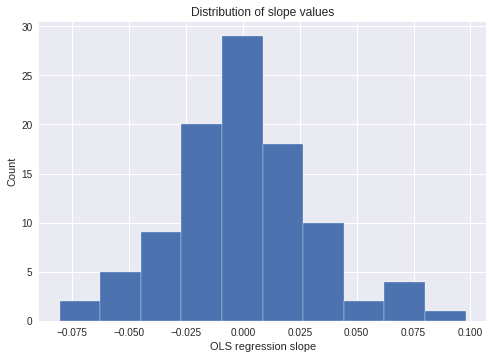

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

slopes = []
for i in range(100):
  x = np.random.normal(0,1,1000)
  y = np.random.normal(0,1,1000)
  x_with_intercept = sm.add_constant(x)
  model = sm.OLS(y, x_with_intercept).fit()
  slopes.append(model.params[1])

slope_std = np.std(slopes)
slope_mean = np.mean(slopes)
print(f"Slope std: {slope_std}")
print(f"Slope mean: {slope_mean}")

plt.hist(slopes, ec='azure')
plt.title('Distribution of slope values')
plt.xlabel('OLS regression slope')
plt.ylabel('Count')
plt.savefig('/content/drive/My Drive/slopes_dist.png', dpi=300)